In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(60000, 60000, 10000, 10000)

In [4]:
X_train=X_train/255
X_test = X_test/255

In [5]:
X_train_flat=X_train.reshape(len(X_train), 28*28)
X_test_flat=X_test.reshape(len(X_test), 28*28)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, Y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2767 - accuracy: 0.9213
Epoch 2/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1219 - accuracy: 0.9640
Epoch 3/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0842 - accuracy: 0.9752
Epoch 4/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0638 - accuracy: 0.9807
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0498 - accuracy: 0.9850
Epoch 6/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0413 - accuracy: 0.9868
Epoch 7/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0324 - accuracy: 0.9900


In [7]:
model.evaluate(X_test_flat,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9786


[0.07527154684066772, 0.978600025177002]

In [8]:
Y_predicted = model.predict(X_test_flat)

313/313 [==============================] - 1s 2ms/step


In [9]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

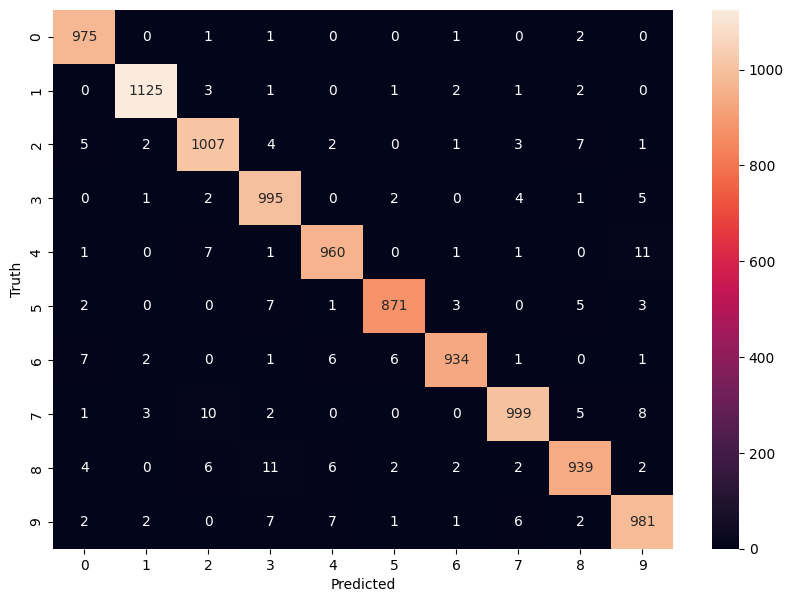

In [10]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')